# Clustering Users

## IMPORTS

In [8]:
import pandas as pd
import numpy as np
import pickle
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE

## Import Database

In [2]:
df_users = pd.read_csv("../data/users_final_dataset.csv", low_memory=False)

In [3]:
df_users.shape

(198895, 102)

In [11]:
df_users.columns.tolist()

['id',
 'nb_fiche_outils',
 'nb_guide_pratique',
 'nb_transition_ecologique',
 'nb_sante_mentale',
 'nb_ecole_inclusive',
 'nb_cps',
 'nb_reussite_tous_eleves',
 'total_interactions_x',
 'diversite_contenus',
 'nb_vote',
 'nb_comments',
 'nb_opened_mail',
 'nb_clicked_mail',
 'statut_infolettre',
 'statut_mailchimp',
 'code_postal',
 'departement',
 'academie',
 'anciennete',
 'created_at',
 'degre',
 'maternelle',
 'elementaire',
 'college',
 'lycee',
 'lycee_pro',
 'autre',
 'type_etab',
 'discipline',
 'niveau_tps',
 'niveau_ps',
 'niveau_ms',
 'niveau_gs',
 'niveau_cp',
 'niveau_ce1',
 'niveau_ce2',
 'niveau_cm1',
 'niveau_cm2',
 'niveau_6e',
 'niveau_5e',
 'niveau_4e',
 'niveau_3e',
 'niveau_2nde',
 'niveau_1ere',
 'niveau_terminale',
 'niveau_cap',
 'niveau_bac_pro',
 'niveau_post_bac',
 'niveau_segpa',
 'niveau_ash',
 'niveau_direction',
 'niveau_formateur',
 'niveau_documentaliste',
 'join_date',
 'last_action_date',
 'total_interactions_y',
 'week_minus_0',
 'week_minus_1',
 '

In [6]:
df_users.describe()

id  nb_fiche_outils  nb_guide_pratique  \
count  198895.000000    198895.000000      198895.000000   
mean   104945.526444         1.514296           0.467986   
std     59569.467391        10.644729           1.652714   
min         1.000000         0.000000           0.000000   
25%     54167.500000         0.000000           0.000000   
50%    105124.000000         0.000000           0.000000   
75%    155720.500000         0.000000           0.000000   
max    210720.000000      1761.000000         291.000000   

       nb_transition_ecologique  nb_sante_mentale  nb_ecole_inclusive  \
count             198895.000000     198895.000000       198895.000000   
mean                   0.019136          0.028100            0.105468   
std                    0.346598          0.392225            0.891159   
min                    0.000000          0.000000            0.000000   
25%                    0.000000          0.000000            0.000000   
50%                    0.000000          0.000000            0.000000   
75%                    0.000000          0.000000            0.000000   
max                   86.000000         66.000000          169.000000   

              nb_cps  nb_reussite_tous_eleves  total_interactions_x  \
count  198895.000000            198895.000000         198895.000000   
mean        0.174414                 0.557711              2.022409   
std         0.963484                 2.505197             11.727008   
min         0.000000                 0.000000              0.000000   
25%         0.000000                 0.000000              0.000000   
50%         0.000000                 0.000000              0.000000   
75%         0.000000                 0.000000              1.000000   
max       114.000000               387.000000           2052.000000   

       diversite_contenus  ...        topic_7        topic_8        topic_9  \
count       198895.000000  ...  198895.000000  198895.000000  198895.000000   
mean             1.718671  ...       0.028080       0.004314       0.011845   
std              8.536877  ...       0.327926       0.074917       0.125729   
min              0.000000  ...       0.000000       0.000000       0.000000   
25%              0.000000  ...       0.000000       0.000000       0.000000   
50%              0.000000  ...       0.000000       0.000000       0.000000   
75%              1.000000  ...       0.000000       0.000000       0.000000   
max            614.000000  ...      21.000000       6.000000      11.000000   

            topic_10       topic_11       topic_12       topic_13  \
count  198895.000000  198895.000000  198895.000000  198895.000000   
mean        0.041902       0.047890       0.017773       0.006526   
std         0.323827       0.566053       0.253091       0.108826   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max        23.000000      45.000000      33.000000      14.000000   

            topic_14       topic_15    topic_count  
count  198895.000000  198895.000000  198895.000000  
mean        0.051268       0.075336       0.956439  
std         0.289125       0.411439       1.730818  
min         0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000  
75%         0.000000       0.000000       1.000000  
max         8.000000      19.000000      17.000000  

[8 rows x 94 columns]

## Explorate for clustering

In [13]:
df = df_users.copy()

In [22]:
engagement_features = [
    'nb_fiche_outils', 'nb_guide_pratique', 'nb_transition_ecologique',
    'nb_sante_mentale', 'nb_ecole_inclusive', 'nb_cps', 'nb_reussite_tous_eleves',
    'total_interactions_x', 'diversite_contenus', 'total_interactions_y',
    'nb_vote', 'nb_comments', 'nb_opened_mail', 'nb_clicked_mail'
]

engagement_stats = df[engagement_features].describe()
print(engagement_stats.round(2))
        

       nb_fiche_outils  nb_guide_pratique  nb_transition_ecologique  \
count        198895.00          198895.00                 198895.00   
mean              1.51               0.47                      0.02   
std              10.64               1.65                      0.35   
min               0.00               0.00                      0.00   
25%               0.00               0.00                      0.00   
50%               0.00               0.00                      0.00   
75%               0.00               0.00                      0.00   
max            1761.00             291.00                     86.00   

       nb_sante_mentale  nb_ecole_inclusive     nb_cps  \
count         198895.00           198895.00  198895.00   
mean               0.03                0.11       0.17   
std                0.39                0.89       0.96   
min                0.00                0.00       0.00   
25%                0.00                0.00       0.00   
50%         

In [23]:
df['activity_level'] = 'inactive'
df.loc[df['total_interactions_y'] > 0, 'activity_level'] = 'email_only'
df.loc[df['total_interactions_x'] > 0, 'activity_level'] = 'platform_active'

activity_distribution = df['activity_level'].value_counts()
print("Distribution des niveaux d'activit√©:")
for level, count in activity_distribution.items():
    pct = count / len(df) * 100
    print(f"  {level}: {count:,} ({pct:.1f}%)")

email_vs_platform = pd.crosstab(
    df['nb_opened_mail'] > 0,
    df['total_interactions_x'] > 0,
    margins=True
)
print("Ouvert email vs Actif plateforme:")
print(email_vs_platform)

print(f"total_interactions_x (plateforme): moyenne={df['total_interactions_x'].mean():.1f}")
print(f"total_interactions_y (global): moyenne={df['total_interactions_y'].mean():.1f}")

# Corr√©lation entre les deux
correlation = df['total_interactions_x'].corr(df['total_interactions_y'])
print(f"Corr√©lation entre les deux: {correlation:.3f}")

# Utilisateurs avec beaucoup d'email mais peu de plateforme (segment cl√© !)
email_heavy = df[(df['nb_opened_mail'] > 20) & (df['total_interactions_x'] <= 2)]
print(f"\nUtilisateurs 'email-heavy, platform-light': {len(email_heavy):,} ({len(email_heavy)/len(df)*100:.1f}%)")

Distribution des niveaux d'activit√©:
  email_only: 114,309 (57.5%)
  platform_active: 76,220 (38.3%)
  inactive: 8,366 (4.2%)
Ouvert email vs Actif plateforme:
total_interactions_x   False   True     All
nb_opened_mail                             
False                  22759   7610   30369
True                   99916  68610  168526
All                   122675  76220  198895
total_interactions_x (plateforme): moyenne=2.0
total_interactions_y (global): moyenne=79.9
Corr√©lation entre les deux: 0.036

Utilisateurs 'email-heavy, platform-light': 56,803 (28.6%)


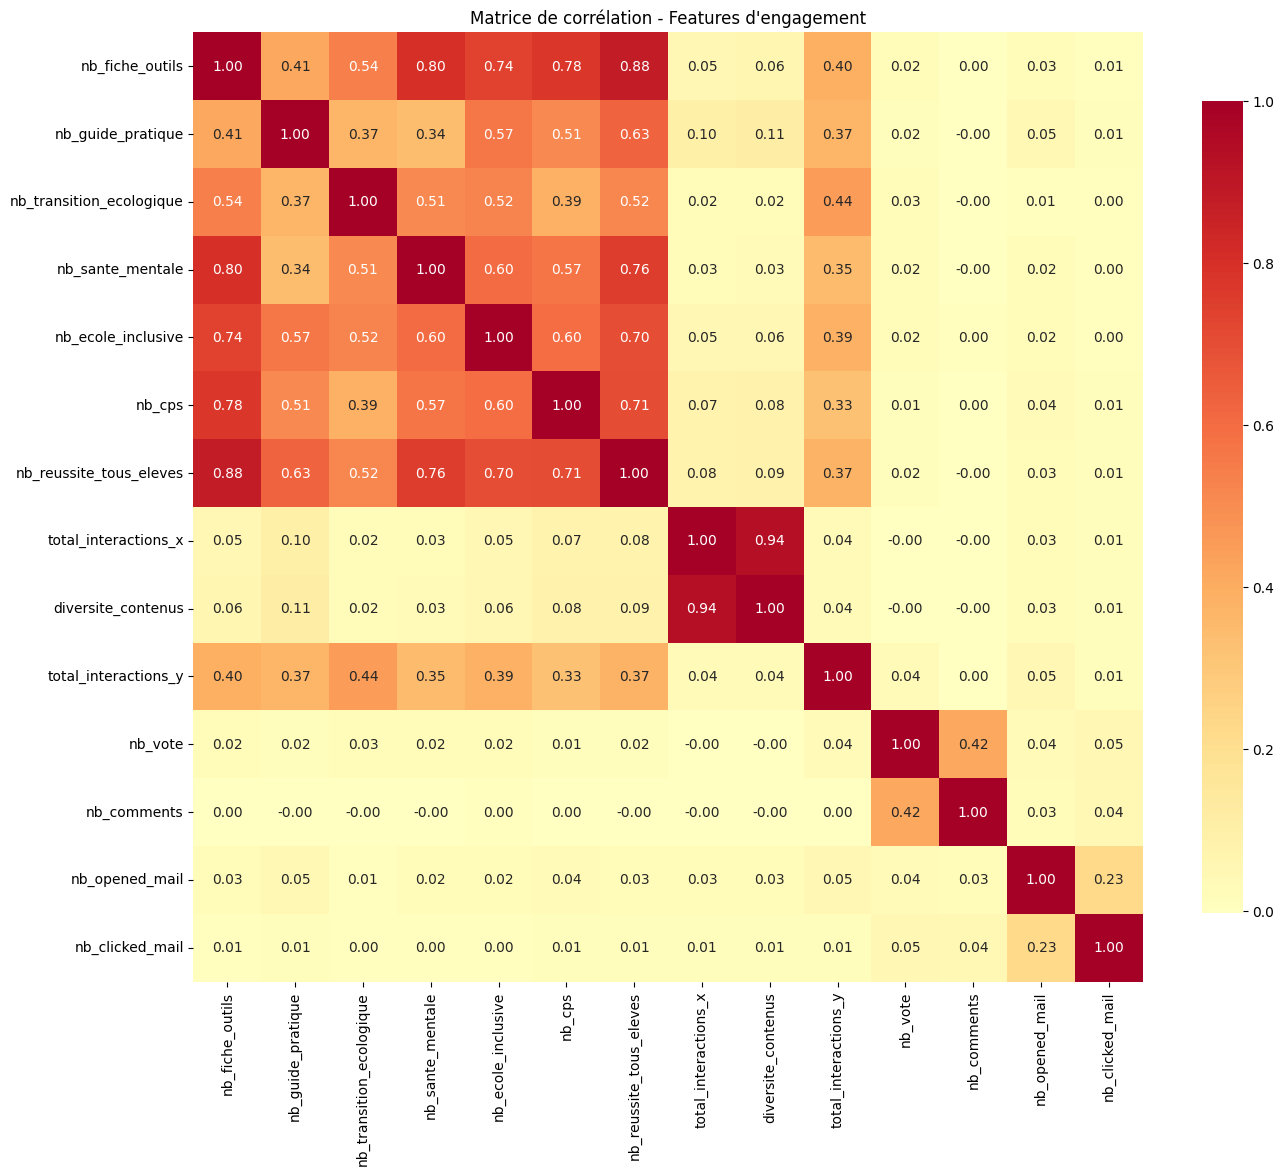


=== CORR√âLATIONS FORTES (>0.7) ===
nb_fiche_outils ‚Üî nb_sante_mentale: 0.797
nb_fiche_outils ‚Üî nb_ecole_inclusive: 0.737
nb_fiche_outils ‚Üî nb_cps: 0.775
nb_fiche_outils ‚Üî nb_reussite_tous_eleves: 0.877
nb_sante_mentale ‚Üî nb_reussite_tous_eleves: 0.755
nb_cps ‚Üî nb_reussite_tous_eleves: 0.708
total_interactions_x ‚Üî diversite_contenus: 0.937

=== FOCUS SUR LES INTERACTIONS ===
total_interactions_x ‚Üî total_interactions_y: 0.036
total_interactions_x ‚Üî diversite_contenus: 0.937


In [25]:
engagement_features = [
    'nb_fiche_outils', 'nb_guide_pratique', 'nb_transition_ecologique',
    'nb_sante_mentale', 'nb_ecole_inclusive', 'nb_cps', 'nb_reussite_tous_eleves',
    'total_interactions_x', 'diversite_contenus', 'total_interactions_y',
    'nb_vote', 'nb_comments', 'nb_opened_mail', 'nb_clicked_mail'
]

corr_matrix = df[engagement_features].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Matrice de corr√©lation - Features d\'engagement')
plt.tight_layout()
plt.show()

# Identifier les corr√©lations fortes (> 0.7 ou < -0.7)
print(f"\n=== CORR√âLATIONS FORTES (>0.7) ===")
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            high_corr_pairs.append({
                'feature1': corr_matrix.columns[i],
                'feature2': corr_matrix.columns[j],
                'correlation': corr_val
            })


for pair in high_corr_pairs:
    print(f"{pair['feature1']} ‚Üî {pair['feature2']}: {pair['correlation']:.3f}")

print(f"\n=== FOCUS SUR LES INTERACTIONS ===")
print(f"total_interactions_x ‚Üî total_interactions_y: {corr_matrix.loc['total_interactions_x', 'total_interactions_y']:.3f}")
print(f"total_interactions_x ‚Üî diversite_contenus: {corr_matrix.loc['total_interactions_x', 'diversite_contenus']:.3f}")

In [26]:
topic_features = [col for col in df.columns if col.startswith('topic_')]
print(f"Nombre de topics: {len(topic_features)}")

# Statistiques des topics
topic_stats = df[topic_features].describe()
print("\nüìö TOPICS LES PLUS POPULAIRES:")
topic_means = topic_stats.loc['mean'].sort_values(ascending=False)
print(topic_means.head(10))

print("\nüìö TOPICS AVEC LE PLUS DE VARIANCE (diversit√©):")
topic_vars = df[topic_features].var().sort_values(ascending=False)
print(topic_vars.head(10))

# Pourcentage d'utilisateurs touch√©s par chaque topic
print(f"\nüìö COUVERTURE DES TOPICS (% utilisateurs > 0):")
topic_coverage = {}
for topic in topic_features:
    coverage = (df[topic] > 0).mean() * 100
    topic_coverage[topic] = coverage

topic_coverage_sorted = sorted(topic_coverage.items(), key=lambda x: x[1], reverse=True)
for topic, coverage in topic_coverage_sorted[:10]:
    print(f"  {topic}: {coverage:.1f}% des utilisateurs")

# Analyse du topic_count
print(f"\nüìö TOPIC_COUNT (diversit√© th√©matique):")
print(f"  Moyenne: {df['topic_count'].mean():.2f}")
print(f"  M√©diane: {df['topic_count'].median():.2f}")
print(f"  Max: {df['topic_count'].max():.0f}")
print(f"  % avec 0 topics: {(df['topic_count'] == 0).mean()*100:.1f}%")

# Corr√©lation topic_count avec l'engagement
engagement_simple = ['total_interactions_x', 'total_interactions_y', 'diversite_contenus']
print(f"\nüìö CORR√âLATIONS TOPIC_COUNT avec ENGAGEMENT:")
for eng_feature in engagement_simple:
    corr = df['topic_count'].corr(df[eng_feature])
    print(f"  topic_count ‚Üî {eng_feature}: {corr:.3f}")

Nombre de topics: 18

üìö TOPICS LES PLUS POPULAIRES:
topic_-1       1.067417
topic_count    0.956439
topic_0        0.357621
topic_1        0.263104
topic_2        0.128646
topic_15       0.075336
topic_5        0.066452
topic_14       0.051268
topic_11       0.047890
topic_10       0.041902
Name: mean, dtype: float64

üìö TOPICS AVEC LE PLUS DE VARIANCE (diversit√©):
topic_-1       20.412526
topic_0         3.814986
topic_count     2.995729
topic_1         1.298459
topic_2         0.611398
topic_11        0.320416
topic_5         0.190557
topic_15        0.169282
topic_7         0.107536
topic_10        0.104864
dtype: float64

üìö COUVERTURE DES TOPICS (% utilisateurs > 0):
  topic_count: 41.7% des utilisateurs
  topic_-1: 32.9% des utilisateurs
  topic_0: 13.4% des utilisateurs
  topic_1: 12.4% des utilisateurs
  topic_2: 6.9% des utilisateurs
  topic_15: 5.4% des utilisateurs
  topic_5: 4.4% des utilisateurs
  topic_14: 3.9% des utilisateurs
  topic_10: 2.8% des utilisateurs
  

In [21]:
# Maintenant qu'on a explor√©, faisons les choix de features
print("=== SYNTH√àSE POUR S√âLECTION DE FEATURES ===")

# 1. FEATURES D'ENGAGEMENT - D√©cisions bas√©es sur corr√©lations
print("1Ô∏è‚É£ FEATURES D'ENGAGEMENT:")
print("‚úÖ √Ä GARDER:")
print("  - total_interactions_y (email + global)")
print("  - nb_opened_mail, nb_clicked_mail (email behavior)")
print("  - nb_fiche_outils (feature principale, corr√©l√©e aux d√©fis)")
print("  - Un seul des d√©fis prioritaires (nb_reussite_tous_eleves - le plus corr√©l√©)")

print("‚ùå √Ä SUPPRIMER:")
print("  - total_interactions_x (redondant avec diversite_contenus)")
print("  - diversite_contenus (corr√©lation 0.937 avec total_interactions_x)")
print("  - Autres d√©fis prioritaires (corr√©l√©s avec nb_fiche_outils)")
print("  - nb_vote, nb_comments (trop de z√©ros)")

# 2. FEATURES TEMPORELLES
print("\n2Ô∏è‚É£ FEATURES TEMPORELLES:")
print("‚úÖ √Ä GARDER (post-correction du bug temporel):")
print("  - 3-4 semaines r√©centes (apr√®s correction)")
print("  - 2-3 mois r√©cents")
print("  - 1-2 ann√©es (pour la profondeur historique)")

# 3. FEATURES TOPICS
print("\n3Ô∏è‚É£ FEATURES TOPICS:")
print("‚úÖ √Ä GARDER:")
print("  - topic_count (diversit√© th√©matique)")
print("  - Top 5-6 topics avec plus de variance:")
for topic, var in df[topic_features].var().sort_values(ascending=False).head(6).items():
    coverage = (df[topic] > 0).mean() * 100
    print(f"    {topic}: var={var:.1f}, couverture={coverage:.1f}%")

# 4. FEATURES PROFIL
print("\n4Ô∏è‚É£ FEATURES PROFIL:")
print("‚úÖ √Ä GARDER:")
print("  - anciennete, degre (info d√©mographique)")
print("  - maternelle, elementaire, college, lycee, lycee_pro (niveau enseign√©)")
print("‚ùå √Ä SUPPRIMER:")
print("  - niveau_* d√©taill√©s (redondants avec les grands niveaux)")

# 5. PROPOSITION FINALE
engagement_keep = ['total_interactions_y', 'nb_opened_mail', 'nb_clicked_mail', 'nb_fiche_outils', 'nb_reussite_tous_eleves']
temporal_keep = ['week_minus_3', 'week_minus_4', 'month_minus_1', 'month_minus_2', 'year_minus_0']  # √Ä ajuster apr√®s correction
topics_keep = ['topic_count'] + [topic for topic, _ in df[topic_features].var().sort_values(ascending=False).head(5).items()]
profile_keep = ['anciennete', 'degre', 'maternelle', 'elementaire', 'college', 'lycee', 'lycee_pro']

final_features = engagement_keep + temporal_keep + topics_keep + profile_keep

print(f"\nüéØ PROPOSITION FINALE:")
print(f"Features s√©lectionn√©es: {len(final_features)}")
print(f"  Engagement: {len(engagement_keep)}")
print(f"  Temporel: {len(temporal_keep)}")
print(f"  Topics: {len(topics_keep)}")
print(f"  Profil: {len(profile_keep)}")

print(f"\nListe compl√®te: {final_features}")

=== SYNTH√àSE POUR S√âLECTION DE FEATURES ===
1Ô∏è‚É£ FEATURES D'ENGAGEMENT:
‚úÖ √Ä GARDER:
  - total_interactions_y (email + global)
  - nb_opened_mail, nb_clicked_mail (email behavior)
  - nb_fiche_outils (feature principale, corr√©l√©e aux d√©fis)
  - Un seul des d√©fis prioritaires (nb_reussite_tous_eleves - le plus corr√©l√©)
‚ùå √Ä SUPPRIMER:
  - total_interactions_x (redondant avec diversite_contenus)
  - diversite_contenus (corr√©lation 0.937 avec total_interactions_x)
  - Autres d√©fis prioritaires (corr√©l√©s avec nb_fiche_outils)
  - nb_vote, nb_comments (trop de z√©ros)

2Ô∏è‚É£ FEATURES TEMPORELLES:
‚úÖ √Ä GARDER (post-correction du bug temporel):
  - 3-4 semaines r√©centes (apr√®s correction)
  - 2-3 mois r√©cents
  - 1-2 ann√©es (pour la profondeur historique)

3Ô∏è‚É£ FEATURES TOPICS:
‚úÖ √Ä GARDER:
  - topic_count (diversit√© th√©matique)
  - Top 5-6 topics avec plus de variance:
    topic_-1: var=20.4, couverture=32.9%
    topic_0: var=3.8, couverture=13.4%
    topic_

=== SYNTH√àSE POUR S√âLECTION DE FEATURES ===  
  
1Ô∏è‚É£ FEATURES D'ENGAGEMENT:  
‚úÖ √Ä GARDER:
  - total_interactions_y (email + global)
  - nb_opened_mail, nb_clicked_mail (email behavior)
  - nb_fiche_outils (feature principale, corr√©l√©e aux d√©fis)
  - Un seul des d√©fis prioritaires (nb_reussite_tous_eleves - le plus corr√©l√©)
‚ùå √Ä SUPPRIMER:
  - total_interactions_x (redondant avec diversite_contenus)
  - diversite_contenus (corr√©lation 0.937 avec total_interactions_x)
  - Autres d√©fis prioritaires (corr√©l√©s avec nb_fiche_outils)
  - nb_vote, nb_comments (trop de z√©ros)

2Ô∏è‚É£ FEATURES TEMPORELLES:  
‚úÖ √Ä GARDER :
  - 3-4 semaines r√©centes 
  - 2-3 mois r√©cents
  - 1-2 ann√©es (pour la profondeur historique)

3Ô∏è‚É£ FEATURES TOPICS:   
‚úÖ √Ä GARDER:
  - topic_count (diversit√© th√©matique)
  - Top 5-6 topics avec plus de variance:  
    topic_-1: var=20.4, couverture=32.9%  
    topic_0: var=3.8, couverture=13.4%  
    topic_count: var=3.0, couverture=41.7%  
    topic_1: var=1.3, couverture=12.4%  
    topic_2: var=0.6, couverture=6.9%  
    topic_11: var=0.3, couverture=2.2%  

4Ô∏è‚É£ FEATURES PROFIL:  
‚úÖ √Ä GARDER:  
  - anciennete, degre (info d√©mographique)
  - maternelle, elementaire, college, lycee, lycee_pro (niveau enseign√©)

‚ùå √Ä SUPPRIMER:
  - niveau_* d√©taill√©s (redondants avec les grands niveaux)

üéØ FINALE:  
Features s√©lectionn√©es: 23
 - Engagement: 5
 - Temporel: 5
 - Topics: 6
 - Profil: 7

Liste compl√®te: ['total_interactions_y', 'nb_opened_mail', 'nb_clicked_mail', 'nb_fiche_outils', 'nb_reussite_tous_eleves', 'week_minus_3', 'week_minus_4', 'month_minus_1', 'month_minus_2', 'year_minus_0', 'topic_count', 'topic_-1', 'topic_0', 'topic_1', 'topic_2', 'anciennete', 'degre', 'maternelle', 'elementaire', 'college', 'lycee', 'lycee_pro']

In [27]:
# Liste finale nettoy√©e
final_features = [
    'total_interactions_y', 'nb_opened_mail', 'nb_clicked_mail', 'nb_fiche_outils', 'nb_reussite_tous_eleves',
    'week_minus_3', 'week_minus_4', 'month_minus_1', 'month_minus_2', 'year_minus_0',
    'topic_count', 'topic_-1', 'topic_0', 'topic_1', 'topic_2',
    'anciennete', 'degre', 'maternelle', 'elementaire', 'college', 'lycee', 'lycee_pro'
]

print(f"=== DATASET DE CLUSTERING - {len(final_features)} features ===")

# V√©rification
X_clustering = df[final_features]
print(f"Shape: {X_clustering.shape}")

# Statistiques
clustering_stats = X_clustering.describe()
print("\nStatistiques des features s√©lectionn√©es:")
print(clustering_stats.round(2))

# Features skewed √† transformer
print(f"\n=== FEATURES √Ä LOG-TRANSFORMER ===")
skewed_features = []
for col in final_features:
    q95 = df[col].quantile(0.95)
    max_val = df[col].max()
    
    if q95 > 0 and max_val / q95 > 5:
        skewed_features.append(col)
        zero_pct = (df[col] == 0).mean() * 100
        print(f"  {col}: Max/Q95={max_val/q95:.1f}, Zeros={zero_pct:.1f}%")

# Matrice de corr√©lation finale
print(f"\n=== CORR√âLATIONS DANS LA S√âLECTION FINALE ===")
final_corr = X_clustering.corr()
high_corr_final = []

for i in range(len(final_corr.columns)):
    for j in range(i+1, len(final_corr.columns)):
        corr_val = final_corr.iloc[i, j]
        if abs(corr_val) > 0.6:  # Seuil plus bas pour d√©tecter les corr√©lations
            high_corr_final.append({
                'feature1': final_corr.columns[i],
                'feature2': final_corr.columns[j],
                'correlation': corr_val
            })

if high_corr_final:
    print("Corr√©lations moyennes/fortes restantes:")
    for pair in high_corr_final:
        print(f"  {pair['feature1']} ‚Üî {pair['feature2']}: {pair['correlation']:.3f}")
else:
    print("‚úÖ Pas de corr√©lations probl√©matiques!")

print(f"\nüéØ PR√äT POUR LE CLUSTERING:")
print(f"  ‚Ä¢ Features: {len(final_features)}")
print(f"  ‚Ä¢ √Ä log-transformer: {len(skewed_features)}")
print(f"  ‚Ä¢ Utilisateurs: {len(df):,}")

=== DATASET DE CLUSTERING - 22 features ===
Shape: (198895, 22)

Statistiques des features s√©lectionn√©es:
       total_interactions_y  nb_opened_mail  nb_clicked_mail  nb_fiche_outils  \
count             198895.00       198895.00        198895.00        198895.00   
mean                  79.94           35.93             5.64             1.51   
std                  163.29           60.35            22.17            10.64   
min                    0.00            0.00             0.00             0.00   
25%                    7.00            2.00             0.00             0.00   
50%                   23.00            8.00             0.00             0.00   
75%                   95.00           41.00             4.00             0.00   
max                45834.00         1658.00          4239.00          1761.00   

       nb_reussite_tous_eleves  week_minus_3  week_minus_4  month_minus_1  \
count                198895.00     198895.00     198895.00      198895.00   
mean    

In [28]:
# Features finales
final_features = [
    'total_interactions_y', 'nb_opened_mail', 'nb_clicked_mail', 'nb_fiche_outils', 'nb_reussite_tous_eleves',
    'week_minus_3', 'week_minus_4', 'month_minus_1', 'month_minus_2', 'year_minus_0',
    'topic_count', 'topic_-1', 'topic_0', 'topic_1', 'topic_2',
    'anciennete', 'degre', 'maternelle', 'elementaire', 'college', 'lycee', 'lycee_pro'
]

# Features √† log-transformer
log_features = [
    'total_interactions_y', 'nb_opened_mail', 'nb_clicked_mail', 'nb_fiche_outils', 'nb_reussite_tous_eleves',
    'week_minus_4', 'month_minus_1', 'month_minus_2', 'year_minus_0',
    'topic_-1', 'topic_0', 'topic_1', 'topic_2'
]

print("=== PREPROCESSING POUR CLUSTERING ===")

# 1. Pr√©paration des donn√©es
X = df[final_features].copy()
print(f"Dataset initial: {X.shape}")

# 2. Log-transformation des features skewed
X_processed = X.copy()
for feature in log_features:
    if feature in X_processed.columns:
        X_processed[f'{feature}_log'] = np.log1p(X_processed[feature])  # log(1+x)
        X_processed.drop(feature, axis=1, inplace=True)

print(f"Apr√®s log-transform: {X_processed.shape}")
print(f"Features transform√©es: {len(log_features)}")

# 3. Scaling avec RobustScaler
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_processed)
print(f"‚úÖ Scaling termin√© avec RobustScaler")

# 4. Recherche du nombre optimal de clusters
print(f"\n=== RECHERCHE DU NOMBRE OPTIMAL DE CLUSTERS ===")
K_range = range(3, 9)
inertias = []
silhouette_scores = []

for k in K_range:
    print(f"Testing K={k}...", end=" ")
    
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    
    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_scaled, clusters)
    
    inertias.append(inertia)
    silhouette_scores.append(silhouette)
    
    print(f"Silhouette: {silhouette:.3f}")

# Meilleur K selon silhouette
best_k = K_range[np.argmax(silhouette_scores)]
best_silhouette = max(silhouette_scores)

print(f"\nüèÜ MEILLEUR K: {best_k}")
print(f"üèÜ MEILLEUR SILHOUETTE: {best_silhouette:.3f}")

# 5. Clustering final
print(f"\n=== CLUSTERING FINAL (K={best_k}) ===")
final_kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
final_clusters = final_kmeans.fit_predict(X_scaled)

# Distribution des clusters
cluster_distribution = pd.Series(final_clusters).value_counts().sort_index()
print(f"Distribution des clusters:")
for cluster_id, count in cluster_distribution.items():
    percentage = count / len(final_clusters) * 100
    print(f"  Cluster {cluster_id}: {count:,} utilisateurs ({percentage:.1f}%)")

=== PREPROCESSING POUR CLUSTERING ===
Dataset initial: (198895, 22)
Apr√®s log-transform: (198895, 22)
Features transform√©es: 13
‚úÖ Scaling termin√© avec RobustScaler

=== RECHERCHE DU NOMBRE OPTIMAL DE CLUSTERS ===
Testing K=3... Silhouette: 0.484
Testing K=4... Silhouette: 0.301
Testing K=5... Silhouette: 0.298
Testing K=6... Silhouette: 0.210
Testing K=7... Silhouette: 0.157
Testing K=8... Silhouette: 0.155

üèÜ MEILLEUR K: 3
üèÜ MEILLEUR SILHOUETTE: 0.484

=== CLUSTERING FINAL (K=3) ===
Distribution des clusters:
  Cluster 0: 22,252 utilisateurs (11.2%)
  Cluster 1: 176,430 utilisateurs (88.7%)
  Cluster 2: 213 utilisateurs (0.1%)


In [29]:
# Analysons ce qui a foir√©
print("=== DIAGNOSTIC DU CLUSTERING RAT√â ===")

# 1. Regardons les caract√©ristiques de chaque cluster
df_with_clusters = df.copy()
df_with_clusters['cluster'] = final_clusters

# Profil de chaque cluster
for cluster_id in [0, 1, 2]:
    cluster_data = df_with_clusters[df_with_clusters['cluster'] == cluster_id]
    print(f"\nüìä CLUSTER {cluster_id} ({len(cluster_data):,} utilisateurs, {len(cluster_data)/len(df)*100:.1f}%):")
    
    # Quelques features cl√©s
    key_features = ['total_interactions_y', 'nb_opened_mail', 'nb_fiche_outils', 'topic_count']
    for feature in key_features:
        mean_val = cluster_data[feature].mean()
        median_val = cluster_data[feature].median()
        max_val = cluster_data[feature].max()
        print(f"  {feature}: Mean={mean_val:.1f}, Median={median_val:.1f}, Max={max_val:.1f}")

# 2. Le probl√®me : trop d'utilisateurs inactifs
print(f"\n=== PROBL√àME IDENTIFI√â ===")
inactive_users = df[df['total_interactions_y'] <= 10]  # Tr√®s peu actifs
print(f"Utilisateurs avec ‚â§10 interactions: {len(inactive_users):,} ({len(inactive_users)/len(df)*100:.1f}%)")

very_active = df[df['total_interactions_y'] > 100]
print(f"Utilisateurs avec >100 interactions: {len(very_active):,} ({len(very_active)/len(df)*100:.1f}%)")

# 3. Distribution de la feature principale
print(f"\n=== DISTRIBUTION DE L'ACTIVIT√â ===")
print(f"total_interactions_y:")
print(f"  0-10: {(df['total_interactions_y'] <= 10).sum():,} ({(df['total_interactions_y'] <= 10).mean()*100:.1f}%)")
print(f"  11-50: {((df['total_interactions_y'] > 10) & (df['total_interactions_y'] <= 50)).sum():,}")
print(f"  51-200: {((df['total_interactions_y'] > 50) & (df['total_interactions_y'] <= 200)).sum():,}")
print(f"  200+: {(df['total_interactions_y'] > 200).sum():,}")

=== DIAGNOSTIC DU CLUSTERING RAT√â ===

üìä CLUSTER 0 (22,252 utilisateurs, 11.2%):
  total_interactions_y: Mean=190.0, Median=119.0, Max=6803.0
  nb_opened_mail: Mean=42.9, Median=13.0, Max=788.0
  nb_fiche_outils: Mean=10.9, Median=5.0, Max=1225.0
  topic_count: Mean=4.9, Median=4.0, Max=17.0

üìä CLUSTER 1 (176,430 utilisateurs, 88.7%):
  total_interactions_y: Mean=65.5, Median=18.0, Max=4264.0
  nb_opened_mail: Mean=35.0, Median=8.0, Max=1658.0
  nb_fiche_outils: Mean=0.3, Median=0.0, Max=305.0
  topic_count: Mean=0.5, Median=0.0, Max=4.0

üìä CLUSTER 2 (213 utilisateurs, 0.1%):
  total_interactions_y: Mean=526.1, Median=203.0, Max=45834.0
  nb_opened_mail: Mean=32.6, Median=5.0, Max=284.0
  nb_fiche_outils: Mean=24.2, Median=5.0, Max=1761.0
  topic_count: Mean=6.4, Median=6.0, Max=17.0

=== PROBL√àME IDENTIFI√â ===
Utilisateurs avec ‚â§10 interactions: 63,913 (32.1%)
Utilisateurs avec >100 interactions: 48,149 (24.2%)

=== DISTRIBUTION DE L'ACTIVIT√â ===
total_interactions_y:
 

**not really usefull. Need to find an other way to cluster**

Transforming into categorical variables and using Ordinal Encoding will:  
Reduce the weight of frequency features (from huge continuous values to a few columns).  
Preserve the information without the outliers that can disrupt everything.  
Make it more interpretable: "average users" vs. "super-active users."  

üîß Transformation strategy:  
Features to categorize:  
total_interactions_y ‚Üí activity_level (low/medium/high)  
nb_opened_mail ‚Üí email_engagement (never/occasional/regular)  
nb_fiche_outils ‚Üí content_usage (none/light/intensive)  
Possibly topic_count ‚Üí thematic_diversity (single/varied)  

In [30]:
# Transformation en features cat√©gorielles ordinales
print("=== TRANSFORMATION EN FEATURES ORDINALES ===")

df_ordinal = df.copy()

# 1. activity_level bas√© sur total_interactions_y
print("üìä ACTIVITY_LEVEL:")
q33 = df['total_interactions_y'].quantile(0.33)
q66 = df['total_interactions_y'].quantile(0.66)
print(f"  Seuils: 0-{q33:.0f} (faible), {q33:.0f}-{q66:.0f} (moyen), {q66:.0f}+ (fort)")

df_ordinal['activity_level'] = 0  # faible par d√©faut
df_ordinal.loc[df['total_interactions_y'] > q33, 'activity_level'] = 1  # moyen
df_ordinal.loc[df['total_interactions_y'] > q66, 'activity_level'] = 2  # fort

activity_dist = df_ordinal['activity_level'].value_counts().sort_index()
for level, count in activity_dist.items():
    level_name = ['Faible', 'Moyen', 'Fort'][level]
    print(f"    {level} ({level_name}): {count:,} ({count/len(df)*100:.1f}%)")

# 2. email_engagement bas√© sur nb_opened_mail
print(f"\nüìß EMAIL_ENGAGEMENT:")
# Seuils m√©tier plus logiques
email_q33 = df['nb_opened_mail'].quantile(0.33)
email_q66 = df['nb_opened_mail'].quantile(0.66)
print(f"  Seuils: 0-{email_q33:.0f} (jamais), {email_q33:.0f}-{email_q66:.0f} (occasionnel), {email_q66:.0f}+ (r√©gulier)")

df_ordinal['email_engagement'] = 0  # jamais
df_ordinal.loc[df['nb_opened_mail'] > email_q33, 'email_engagement'] = 1  # occasionnel  
df_ordinal.loc[df['nb_opened_mail'] > email_q66, 'email_engagement'] = 2  # r√©gulier

email_dist = df_ordinal['email_engagement'].value_counts().sort_index()
for level, count in email_dist.items():
    level_name = ['Jamais', 'Occasionnel', 'R√©gulier'][level]
    print(f"    {level} ({level_name}): {count:,} ({count/len(df)*100:.1f}%)")

# 3. content_usage bas√© sur nb_fiche_outils
print(f"\nüìö CONTENT_USAGE:")
content_q66 = df['nb_fiche_outils'].quantile(0.66)  # 66% ont 0, donc seuil √† 0 et 1
content_q90 = df['nb_fiche_outils'].quantile(0.90)
print(f"  Seuils: 0 (aucun), 1-{content_q90:.0f} (l√©ger), {content_q90:.0f}+ (intensif)")

df_ordinal['content_usage'] = 0  # aucun
df_ordinal.loc[df['nb_fiche_outils'] > 0, 'content_usage'] = 1  # l√©ger
df_ordinal.loc[df['nb_fiche_outils'] > content_q90, 'content_usage'] = 2  # intensif

content_dist = df_ordinal['content_usage'].value_counts().sort_index()
for level, count in content_dist.items():
    level_name = ['Aucun', 'L√©ger', 'Intensif'][level]
    print(f"    {level} ({level_name}): {count:,} ({count/len(df)*100:.1f}%)")

=== TRANSFORMATION EN FEATURES ORDINALES ===
üìä ACTIVITY_LEVEL:
  Seuils: 0-11 (faible), 11-52 (moyen), 52+ (fort)
    0 (Faible): 67,810 (34.1%)
    1 (Moyen): 63,898 (32.1%)
    2 (Fort): 67,187 (33.8%)

üìß EMAIL_ENGAGEMENT:
  Seuils: 0-3 (jamais), 3-21 (occasionnel), 21+ (r√©gulier)
    0 (Jamais): 66,956 (33.7%)
    1 (Occasionnel): 64,980 (32.7%)
    2 (R√©gulier): 66,959 (33.7%)

üìö CONTENT_USAGE:
  Seuils: 0 (aucun), 1-2 (l√©ger), 2+ (intensif)
    0 (Aucun): 152,106 (76.5%)
    1 (L√©ger): 27,195 (13.7%)
    2 (Intensif): 19,594 (9.9%)


In [31]:
df_ordinal

id  nb_fiche_outils  nb_guide_pratique  nb_transition_ecologique  \
0            1              3.0                1.0                       0.0   
1            2              0.0                0.0                       0.0   
2            3              0.0                0.0                       0.0   
3            4             32.0               22.0                       2.0   
4            5              1.0                0.0                       0.0   
...        ...              ...                ...                       ...   
198890  210716              0.0                0.0                       0.0   
198891  210717              2.0                0.0                       0.0   
198892  210718              0.0                0.0                       0.0   
198893  210719              0.0                0.0                       0.0   
198894  210720              1.0                0.0                       0.0   

        nb_sante_mentale  nb_ecole_inclusive  nb_cps  nb_reussite_tous_eleves  \
0                    0.0                 0.0     0.0                      0.0   
1                    0.0                 0.0     0.0                      0.0   
2                    0.0                 0.0     0.0                      0.0   
3                    4.0                 6.0     4.0                      9.0   
4                    0.0                 0.0     0.0                      0.0   
...                  ...                 ...     ...                      ...   
198890               0.0                 0.0     0.0                      0.0   
198891               0.0                 0.0     0.0                      0.0   
198892               0.0                 0.0     0.0                      0.0   
198893               0.0                 0.0     0.0                      0.0   
198894               0.0                 0.0     0.0                      0.0   

        total_interactions_x  diversite_contenus  ...  topic_10  topic_11  \
0                        4.0                 4.0  ...       0.0       0.0   
1                        0.0                 0.0  ...       0.0       0.0   
2                        0.0                 0.0  ...       0.0       0.0   
3                        2.0                 1.0  ...       0.0       0.0   
4                        6.0                 4.0  ...       0.0       0.0   
...                      ...                 ...  ...       ...       ...   
198890                   0.0                 0.0  ...       0.0       0.0   
198891                   2.0                 2.0  ...       0.0       0.0   
198892                   0.0                 0.0  ...       0.0       0.0   
198893                   0.0                 0.0  ...       0.0       0.0   
198894                   1.0                 1.0  ...       0.0       0.0   

        topic_12  topic_13  topic_14 topic_15 topic_count  activity_level  \
0            0.0       0.0       0.0      0.0         5.0               2   
1            0.0       0.0       0.0      0.0         0.0               0   
2            0.0       0.0       0.0      0.0         0.0               0   
3            2.0       3.0       2.0      3.0        14.0               2   
4            0.0       0.0       0.0      0.0         0.0               2   
...          ...       ...       ...      ...         ...             ...   
198890       0.0       0.0       0.0      0.0         0.0               0   
198891       0.0       0.0       0.0      0.0         5.0               1   
198892       0.0       0.0       0.0      0.0         1.0               0   
198893       0.0       0.0       0.0      0.0         0.0               0   
198894       0.0       0.0       0.0      0.0         1.0               0   

       email_engagement  content_usage  
0                     0              2  
1                     2              0  
2                     2              0  
3                     1              2  
4                     0

In [34]:
# Transformation des features temporelles en ordinales
print("=== TRANSFORMATION ORDINALE DES FEATURES TEMPORELLES ===")

# 1. recent_activity (bas√© sur month_minus_1)
print("üìÖ RECENT_ACTIVITY (month_minus_1):")
recent_q33 = df_ordinal['month_minus_1'].quantile(0.33)
recent_q66 = df_ordinal['month_minus_1'].quantile(0.66)
print(f"  Seuils: 0-{recent_q33:.0f} (aucune), {recent_q33:.0f}-{recent_q66:.0f} (l√©g√®re), {recent_q66:.0f}+ (forte)")

df_ordinal['recent_activity'] = 0  # aucune
df_ordinal.loc[df_ordinal['month_minus_1'] > recent_q33, 'recent_activity'] = 1  # l√©g√®re
df_ordinal.loc[df_ordinal['month_minus_1'] > recent_q66, 'recent_activity'] = 2  # forte

recent_dist = df_ordinal['recent_activity'].value_counts().sort_index()
for level, count in recent_dist.items():
    level_name = ['Aucune', 'L√©g√®re', 'Forte'][level]
    print(f"    {level} ({level_name}): {count:,} ({count/len(df_ordinal)*100:.1f}%)")

# 2. past_activity (bas√© sur month_minus_2)
print(f"\nüìÖ PAST_ACTIVITY (month_minus_2):")
past_q33 = df_ordinal['month_minus_2'].quantile(0.33)
past_q66 = df_ordinal['month_minus_2'].quantile(0.66)
print(f"  Seuils: 0-{past_q33:.0f} (aucune), {past_q33:.0f}-{past_q66:.0f} (l√©g√®re), {past_q66:.0f}+ (forte)")

df_ordinal['past_activity'] = 0  # aucune
df_ordinal.loc[df_ordinal['month_minus_2'] > past_q33, 'past_activity'] = 1  # l√©g√®re
df_ordinal.loc[df_ordinal['month_minus_2'] > past_q66, 'past_activity'] = 2  # forte

past_dist = df_ordinal['past_activity'].value_counts().sort_index()
for level, count in past_dist.items():
    level_name = ['Aucune', 'L√©g√®re', 'Forte'][level]
    print(f"    {level} ({level_name}): {count:,} ({count/len(df_ordinal)*100:.1f}%)")

# 3. annual_consistency (bas√© sur year_minus_0)
print(f"\nüìÖ ANNUAL_CONSISTENCY (year_minus_0):")
annual_q33 = df_ordinal['year_minus_0'].quantile(0.33)
annual_q66 = df_ordinal['year_minus_0'].quantile(0.66)
print(f"  Seuils: 0-{annual_q33:.0f} (sporadique), {annual_q33:.0f}-{annual_q66:.0f} (r√©gulier), {annual_q66:.0f}+ (tr√®s_actif)")

df_ordinal['annual_consistency'] = 0  # sporadique
df_ordinal.loc[df_ordinal['year_minus_0'] > annual_q33, 'annual_consistency'] = 1  # r√©gulier
df_ordinal.loc[df_ordinal['year_minus_0'] > annual_q66, 'annual_consistency'] = 2  # tr√®s_actif

annual_dist = df_ordinal['annual_consistency'].value_counts().sort_index()
for level, count in annual_dist.items():
    level_name = ['Sporadique', 'R√©gulier', 'Tr√®s_actif'][level]
    print(f"    {level} ({level_name}): {count:,} ({count/len(df_ordinal)*100:.1f}%)")

# Nouvelle liste finale avec temporelles ordinales
ordinal_temporal_features = ['recent_activity', 'past_activity', 'annual_consistency']

print(f"\n‚úÖ Features temporelles transform√©es: {ordinal_temporal_features}")

=== TRANSFORMATION ORDINALE DES FEATURES TEMPORELLES ===
üìÖ RECENT_ACTIVITY (month_minus_1):
  Seuils: 0-0 (aucune), 0-0 (l√©g√®re), 0+ (forte)
    0 (Aucune): 140,039 (70.4%)
    2 (Forte): 58,856 (29.6%)

üìÖ PAST_ACTIVITY (month_minus_2):
  Seuils: 0-0 (aucune), 0-2 (l√©g√®re), 2+ (forte)
    0 (Aucune): 130,224 (65.5%)
    1 (L√©g√®re): 30,649 (15.4%)
    2 (Forte): 38,022 (19.1%)

üìÖ ANNUAL_CONSISTENCY (year_minus_0):
  Seuils: 0-0 (sporadique), 0-8 (r√©gulier), 8+ (tr√®s_actif)
    0 (Sporadique): 82,529 (41.5%)
    1 (R√©gulier): 49,191 (24.7%)
    2 (Tr√®s_actif): 67,175 (33.8%)

‚úÖ Features temporelles transform√©es: ['recent_activity', 'past_activity', 'annual_consistency']


In [35]:
df_ordinal.head()

id  nb_fiche_outils  nb_guide_pratique  nb_transition_ecologique  \
0   1              3.0                1.0                       0.0   
1   2              0.0                0.0                       0.0   
2   3              0.0                0.0                       0.0   
3   4             32.0               22.0                       2.0   
4   5              1.0                0.0                       0.0   

   nb_sante_mentale  nb_ecole_inclusive  nb_cps  nb_reussite_tous_eleves  \
0               0.0                 0.0     0.0                      0.0   
1               0.0                 0.0     0.0                      0.0   
2               0.0                 0.0     0.0                      0.0   
3               4.0                 6.0     4.0                      9.0   
4               0.0                 0.0     0.0                      0.0   

   total_interactions_x  diversite_contenus  ...  topic_13  topic_14  \
0                   4.0                 4.0  ...       0.0       0.0   
1                   0.0                 0.0  ...       0.0       0.0   
2                   0.0                 0.0  ...       0.0       0.0   
3                   2.0                 1.0  ...       3.0       2.0   
4                   6.0                 4.0  ...       0.0       0.0   

   topic_15  topic_count  activity_level email_engagement content_usage  \
0       0.0          5.0               2                0             2   
1       0.0          0.0               0                2             0   
2       0.0          0.0               0                2             0   
3       3.0         14.0               2                1             2   
4       0.0          0.0               2                0             1   

   recent_activity past_activity  annual_consistency  
0                2             2                   2  
1                0             0                   0  
2                0             0                   0  
3                2             2                   2  
4                2             2                   2  

[5 rows x 108 columns]

In [36]:
# S√©lection finale avec toutes les features ordinales
print("=== S√âLECTION FINALE DES FEATURES ===")

# Features ordinales (remplacent toutes les features de fr√©quence/temporelles brutes)
ordinal_features = [
    'activity_level',      # total_interactions_y transform√©
    'email_engagement',    # nb_opened_mail transform√©
    'content_usage',       # nb_fiche_outils transform√©
    'recent_activity',     # month_minus_1 transform√©
    'past_activity',       # month_minus_2 transform√©
    'annual_consistency'   # year_minus_0 transform√©
]

# Features de profil d√©mographique/p√©dagogique
profile_features = [
    'anciennete', 'degre', 
    'maternelle', 'elementaire', 'college', 'lycee', 'lycee_pro'
]

# Features th√©matiques (les plus importantes)
topic_features = [
    'topic_count', 'topic_-1', 'topic_0', 'topic_1', 'topic_2'
]

# Une seule feature d'engagement sp√©cifique (pour nuancer)
specific_features = ['nb_clicked_mail']

# Liste finale
final_ordinal_features = ordinal_features + profile_features + topic_features + specific_features

print(f"Features finales s√©lectionn√©es: {len(final_ordinal_features)}")
print("\nR√©partition:")
print(f"  ‚Ä¢ Ordinales (activit√©/temporel): {len(ordinal_features)}")
print(f"  ‚Ä¢ Profil: {len(profile_features)}")
print(f"  ‚Ä¢ Topics: {len(topic_features)}")
print(f"  ‚Ä¢ Engagement sp√©cifique: {len(specific_features)}")

print(f"\nListe compl√®te:")
for i, feature in enumerate(final_ordinal_features, 1):
    category = ""
    if feature in ordinal_features:
        category = "[ORDINAL]"
    elif feature in profile_features:
        category = "[PROFIL]"
    elif feature in topic_features:
        category = "[TOPIC]"
    else:
        category = "[AUTRE]"
    print(f"{i:2d}. {feature} {category}")

# V√©rification
missing = [f for f in final_ordinal_features if f not in df_ordinal.columns]
if missing:
    print(f"\n‚ö†Ô∏è  Features manquantes: {missing}")
else:
    print(f"\n‚úÖ Toutes les features sont disponibles!")

# Dataset final pour clustering
X_final = df_ordinal[final_ordinal_features]
print(f"\n=== DATASET FINAL POUR CLUSTERING ===")
print(f"Shape: {X_final.shape}")
print(f"Features ordinales: {len(ordinal_features)} (valeurs 0-1-2)")
print(f"Features binaires: {len([f for f in profile_features if f in ['maternelle', 'elementaire', 'college', 'lycee', 'lycee_pro']])}")
print(f"Features continues: anciennete, degre, topics, nb_clicked_mail")

=== S√âLECTION FINALE DES FEATURES ===
Features finales s√©lectionn√©es: 19

R√©partition:
  ‚Ä¢ Ordinales (activit√©/temporel): 6
  ‚Ä¢ Profil: 7
  ‚Ä¢ Topics: 5
  ‚Ä¢ Engagement sp√©cifique: 1

Liste compl√®te:
 1. activity_level [ORDINAL]
 2. email_engagement [ORDINAL]
 3. content_usage [ORDINAL]
 4. recent_activity [ORDINAL]
 5. past_activity [ORDINAL]
 6. annual_consistency [ORDINAL]
 7. anciennete [PROFIL]
 8. degre [PROFIL]
 9. maternelle [PROFIL]
10. elementaire [PROFIL]
11. college [PROFIL]
12. lycee [PROFIL]
13. lycee_pro [PROFIL]
14. topic_count [TOPIC]
15. topic_-1 [TOPIC]
16. topic_0 [TOPIC]
17. topic_1 [TOPIC]
18. topic_2 [TOPIC]
19. nb_clicked_mail [AUTRE]

‚úÖ Toutes les features sont disponibles!

=== DATASET FINAL POUR CLUSTERING ===
Shape: (198895, 19)
Features ordinales: 6 (valeurs 0-1-2)
Features binaires: 5
Features continues: anciennete, degre, topics, nb_clicked_mail


In [37]:
print("=== CLUSTERING AVEC FEATURES ORDINALES ===")

# Dataset final
X_final = df_ordinal[final_ordinal_features]
print(f"Dataset: {X_final.shape}")

# Features √† log-transformer (seulement les continues restantes)
log_features_remaining = ['nb_clicked_mail']  # Plus besoin de log sur les ordinales !
for topic in ['topic_-1', 'topic_0', 'topic_1', 'topic_2']:
    if (X_final[topic] > 0).sum() > 1000:  # Si assez d'utilisateurs
        log_features_remaining.append(topic)

print(f"Features √† log-transformer: {log_features_remaining}")

# Preprocessing
X_processed = X_final.copy()
for feature in log_features_remaining:
    if feature in X_processed.columns:
        X_processed[f'{feature}_log'] = np.log1p(X_processed[feature])
        X_processed.drop(feature, axis=1, inplace=True)

print(f"Apr√®s preprocessing: {X_processed.shape}")

# Scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_processed)
print(f"‚úÖ Scaling termin√©")

# Test de diff√©rents K
print(f"\n=== TEST DE DIFF√âRENTS K ===")
K_range = range(3, 9)
results = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    
    # M√©triques
    silhouette = silhouette_score(X_scaled, clusters)
    inertia = kmeans.inertia_
    
    # Distribution des clusters
    cluster_dist = pd.Series(clusters).value_counts().sort_index()
    min_size = cluster_dist.min()
    max_size = cluster_dist.max()
    balance_ratio = min_size / max_size
    
    results.append({
        'k': k,
        'silhouette': silhouette,
        'balance_ratio': balance_ratio,
        'min_size': min_size,
        'max_size': max_size,
        'clusters': clusters
    })
    
    print(f"K={k}: Silhouette={silhouette:.3f}, Balance={balance_ratio:.3f}")
    print(f"      Distribution: Min={min_size:,}, Max={max_size:,}")

# Choix du meilleur K (√©quilibre silhouette + balance)
print(f"\n=== S√âLECTION DU MEILLEUR K ===")
for result in results:
    score = result['silhouette'] * result['balance_ratio']  # Score composite
    print(f"K={result['k']}: Score composite={score:.3f} (Silhouette={result['silhouette']:.3f} √ó Balance={result['balance_ratio']:.3f})")

# Prendre le meilleur score composite
best_result = max(results, key=lambda x: x['silhouette'] * x['balance_ratio'])
best_k = best_result['k'] 
best_clusters = best_result['clusters']

print(f"\nüèÜ MEILLEUR K: {best_k}")
print(f"üèÜ SILHOUETTE: {best_result['silhouette']:.3f}")
print(f"üèÜ BALANCE: {best_result['balance_ratio']:.3f}")

# Distribution finale
print(f"\n=== DISTRIBUTION FINALE (K={best_k}) ===")
final_dist = pd.Series(best_clusters).value_counts().sort_index()
for cluster_id, count in final_dist.items():
    percentage = count / len(best_clusters) * 100
    print(f"  Cluster {cluster_id}: {count:,} utilisateurs ({percentage:.1f}%)")

=== CLUSTERING AVEC FEATURES ORDINALES ===
Dataset: (198895, 19)
Features √† log-transformer: ['nb_clicked_mail', 'topic_-1', 'topic_0', 'topic_1', 'topic_2']
Apr√®s preprocessing: (198895, 19)
‚úÖ Scaling termin√©

=== TEST DE DIFF√âRENTS K ===
K=3: Silhouette=0.314, Balance=0.061
      Distribution: Min=9,560, Max=157,287
K=4: Silhouette=0.206, Balance=0.073
      Distribution: Min=8,563, Max=116,706
K=5: Silhouette=0.172, Balance=0.107
      Distribution: Min=7,913, Max=74,099
K=6: Silhouette=0.157, Balance=0.100
      Distribution: Min=5,766, Max=57,798
K=7: Silhouette=0.161, Balance=0.070
      Distribution: Min=3,969, Max=56,509
K=8: Silhouette=0.152, Balance=0.063
      Distribution: Min=2,970, Max=47,107

=== S√âLECTION DU MEILLEUR K ===
K=3: Score composite=0.019 (Silhouette=0.314 √ó Balance=0.061)
K=4: Score composite=0.015 (Silhouette=0.206 √ó Balance=0.073)
K=5: Score composite=0.018 (Silhouette=0.172 √ó Balance=0.107)
K=6: Score composite=0.016 (Silhouette=0.157 √ó Balance

In [38]:
# Analysons en d√©tail tous les K pour trouver le plus √©quilibr√©
print("=== ANALYSE D√âTAILL√âE DE TOUS LES K ===")

# On reprend nos r√©sultats pr√©c√©dents
for result in results:
    k = result['k']
    clusters = result['clusters']
    
    print(f"\n" + "="*50)
    print(f"K={k} - Silhouette: {result['silhouette']:.3f}")
    print(f"Balance ratio: {result['balance_ratio']:.3f}")
    
    # Distribution d√©taill√©e
    df_temp = df_ordinal.copy()
    df_temp['cluster'] = clusters
    
    cluster_dist = pd.Series(clusters).value_counts().sort_index()
    print(f"\nDistribution:")
    for cluster_id, count in cluster_dist.items():
        percentage = count / len(clusters) * 100
        print(f"  Cluster {cluster_id}: {count:,} ({percentage:.1f}%)")
    
    # Profil rapide de chaque cluster pour ce K
    print(f"\nProfils rapides:")
    for cluster_id in sorted(df_temp['cluster'].unique()):
        cluster_data = df_temp[df_temp['cluster'] == cluster_id]
        
        # Moyennes des features cl√©s
        activity_mean = cluster_data['activity_level'].mean()
        email_mean = cluster_data['email_engagement'].mean()
        content_mean = cluster_data['content_usage'].mean()
        anciennete_mean = cluster_data['anciennete'].mean()
        
        print(f"    Cluster {cluster_id}: Activity={activity_mean:.1f}, Email={email_mean:.1f}, Content={content_mean:.1f}, Anciennet√©={anciennete_mean:.0f}ans")

# Identifions les K les plus √©quilibr√©s
print(f"\n" + "="*60)
print(f"CLASSEMENT PAR √âQUILIBRE (balance_ratio):")
sorted_results = sorted(results, key=lambda x: x['balance_ratio'], reverse=True)

for i, result in enumerate(sorted_results, 1):
    k = result['k']
    balance = result['balance_ratio']
    silhouette = result['silhouette']
    
    # Taille du plus petit cluster
    min_size = result['min_size']
    min_pct = (min_size / len(df_ordinal)) * 100
    
    print(f"{i}. K={k}: Balance={balance:.3f}, Silhouette={silhouette:.3f}")
    print(f"   Plus petit cluster: {min_size:,} ({min_pct:.1f}%)")
    
    # Crit√®re d'acceptabilit√© : plus petit cluster > 5% ET silhouette > 0.15
    acceptable = min_pct > 5.0 and silhouette > 0.15
    print(f"   Acceptable m√©tier: {'‚úÖ' if acceptable else '‚ùå'}")

=== ANALYSE D√âTAILL√âE DE TOUS LES K ===

K=3 - Silhouette: 0.314
Balance ratio: 0.061

Distribution:
  Cluster 0: 157,287 (79.1%)
  Cluster 1: 32,048 (16.1%)
  Cluster 2: 9,560 (4.8%)

Profils rapides:
    Cluster 0: Activity=0.9, Email=1.0, Content=0.1, Anciennet√©=14ans
    Cluster 1: Activity=1.3, Email=1.1, Content=1.1, Anciennet√©=15ans
    Cluster 2: Activity=1.8, Email=1.2, Content=1.9, Anciennet√©=16ans

K=4 - Silhouette: 0.206
Balance ratio: 0.073

Distribution:
  Cluster 0: 116,706 (58.7%)
  Cluster 1: 28,325 (14.2%)
  Cluster 2: 8,563 (4.3%)
  Cluster 3: 45,301 (22.8%)

Profils rapides:
    Cluster 0: Activity=0.7, Email=0.9, Content=0.1, Anciennet√©=14ans
    Cluster 1: Activity=1.3, Email=1.1, Content=1.2, Anciennet√©=15ans
    Cluster 2: Activity=1.9, Email=1.2, Content=1.9, Anciennet√©=16ans
    Cluster 3: Activity=1.5, Email=1.0, Content=0.1, Anciennet√©=14ans

K=5 - Silhouette: 0.172
Balance ratio: 0.107

Distribution:
  Cluster 0: 74,099 (37.3%)
  Cluster 1: 26,411 

In [39]:
# Analysons K=5 en d√©tail - le plus √©quilibr√©
print("=== ANALYSE APPROFONDIE DE K=5 ===")

# R√©cup√©rer les clusters K=5
k5_result = [r for r in results if r['k'] == 5][0]
k5_clusters = k5_result['clusters']

df_k5 = df_ordinal.copy()
df_k5['cluster'] = k5_clusters

print(f"Silhouette: {k5_result['silhouette']:.3f}")
print(f"Balance: {k5_result['balance_ratio']:.3f}")

# Profil d√©taill√© de chaque cluster
print(f"\n=== PROFILS D√âTAILL√âS DES 5 CLUSTERS ===")

cluster_names = {}
for cluster_id in sorted(df_k5['cluster'].unique()):
    cluster_data = df_k5[df_k5['cluster'] == cluster_id]
    size = len(cluster_data)
    pct = size / len(df_k5) * 100
    
    print(f"\nüìä CLUSTER {cluster_id} ({size:,} utilisateurs, {pct:.1f}%)")
    
    # Features ordinales moyennes
    activity = cluster_data['activity_level'].mean()
    email = cluster_data['email_engagement'].mean()
    content = cluster_data['content_usage'].mean()
    recent = cluster_data['recent_activity'].mean()
    past = cluster_data['past_activity'].mean()
    annual = cluster_data['annual_consistency'].mean()
    
    print(f"  Activit√© g√©n√©rale: {activity:.2f} (0=faible, 2=forte)")
    print(f"  Engagement email: {email:.2f}")
    print(f"  Usage contenu: {content:.2f}")
    print(f"  Activit√© r√©cente: {recent:.2f}")
    print(f"  Activit√© pass√©e: {past:.2f}")
    print(f"  Consistance annuelle: {annual:.2f}")
    
    # Profil d√©mographique
    anciennete = cluster_data['anciennete'].mean()
    degre = cluster_data['degre'].mean()
    
    print(f"  Anciennet√©: {anciennete:.0f} ans")
    print(f"  Degr√©: {degre:.1f} (1=primaire, 2=secondaire)")
    
    # Niveaux d'enseignement (% du cluster)
    maternelle_pct = cluster_data['maternelle'].mean() * 100
    elementaire_pct = cluster_data['elementaire'].mean() * 100
    college_pct = cluster_data['college'].mean() * 100
    lycee_pct = cluster_data['lycee'].mean() * 100
    
    print(f"  Niveaux: Mat.{maternelle_pct:.0f}% Elem.{elementaire_pct:.0f}% Coll.{college_pct:.0f}% Lyc.{lycee_pct:.0f}%")
    
    # Topics
    topic_count = cluster_data['topic_count'].mean()
    print(f"  Diversit√© th√©matique: {topic_count:.1f} topics en moyenne")
    
    # Proposition de nom m√©tier
    if activity < 1.0 and email < 1.0:
        name = "Peu Engag√©s"
    elif activity < 1.0 and email > 1.0:
        name = "Email Seulement" 
    elif activity > 1.5 and content > 1.0:
        name = "Super Actifs"
    elif email > 1.0 and content < 0.5:
        name = "Lecteurs Email"
    else:
        name = "Moyennement Actifs"
    
    cluster_names[cluster_id] = name
    print(f"  üè∑Ô∏è  Nom sugg√©r√©: {name}")

print(f"\n=== R√âSUM√â K=5 ===")
for cluster_id, name in cluster_names.items():
    size = len(df_k5[df_k5['cluster'] == cluster_id])
    pct = size / len(df_k5) * 100
    print(f"Cluster {cluster_id} ({name}): {size:,} ({pct:.1f}%)")

=== ANALYSE APPROFONDIE DE K=5 ===
Silhouette: 0.172
Balance: 0.107

=== PROFILS D√âTAILL√âS DES 5 CLUSTERS ===

üìä CLUSTER 0 (74,099 utilisateurs, 37.3%)
  Activit√© g√©n√©rale: 0.65 (0=faible, 2=forte)
  Engagement email: 0.94
  Usage contenu: 0.09
  Activit√© r√©cente: 0.08
  Activit√© pass√©e: 0.06
  Consistance annuelle: 0.47
  Anciennet√©: 14 ans
  Degr√©: 0.9 (1=primaire, 2=secondaire)
  Niveaux: Mat.41% Elem.65% Coll.1% Lyc.0%
  Diversit√© th√©matique: 0.3 topics en moyenne
  üè∑Ô∏è  Nom sugg√©r√©: Peu Engag√©s

üìä CLUSTER 1 (26,411 utilisateurs, 13.3%)
  Activit√© g√©n√©rale: 1.37 (0=faible, 2=forte)
  Engagement email: 1.10
  Usage contenu: 1.26
  Activit√© r√©cente: 0.83
  Activit√© pass√©e: 0.75
  Consistance annuelle: 1.42
  Anciennet√©: 15 ans
  Degr√©: 1.5 (1=primaire, 2=secondaire)
  Niveaux: Mat.29% Elem.36% Coll.26% Lyc.12%
  Diversit√© th√©matique: 3.0 topics en moyenne
  üè∑Ô∏è  Nom sugg√©r√©: Moyennement Actifs

üìä CLUSTER 2 (7,913 utilisateurs, 4.0%)
  Act

In [40]:
# K=5 semble optimal pour √ätrePROF - finalisons le
print("=== FINALISATION DU CLUSTERING K=5 ===")

# Noms m√©tier finaux
cluster_names_final = {
    0: "Peu Engag√©s Primaire",
    1: "Actifs Polyvalents", 
    2: "Super Users",
    3: "Email-Heavy",
    4: "Peu Engag√©s Secondaire"
}

# Ajout des clusters au dataframe principal
df_final_clustering = df_ordinal.copy()
df_final_clustering['cluster'] = k5_clusters
df_final_clustering['cluster_name'] = df_final_clustering['cluster'].map(cluster_names_final)

print("Clusters finaux:")
for cluster_id, name in cluster_names_final.items():
    count = (df_final_clustering['cluster'] == cluster_id).sum()
    pct = count / len(df_final_clustering) * 100
    print(f"  {cluster_id}. {name}: {count:,} ({pct:.1f}%)")

# M√©triques finales
print(f"\n=== M√âTRIQUES FINALES ===")
print(f"Silhouette Score: {k5_result['silhouette']:.3f}")
print(f"Balance Ratio: {k5_result['balance_ratio']:.3f}")
print(f"Plus petit cluster: {k5_result['min_size']:,} ({k5_result['min_size']/len(df_final_clustering)*100:.1f}%)")
print(f"Plus gros cluster: {k5_result['max_size']:,} ({k5_result['max_size']/len(df_final_clustering)*100:.1f}%)")

# Strat√©gies de contenu par cluster
print(f"\n=== STRAT√âGIES DE CONTENU RECOMMAND√âES ===")
strategies = {
    0: "Contenu d'onboarding primaire, formats courts et visuels",
    1: "Contenu avanc√© multi-niveaux, webinars, guides pratiques",
    2: "Contenu expert, participation √† la cr√©ation, b√™ta-tests",
    3: "Transition email ‚Üí plateforme, contenus exclusifs web",
    4: "Contenu d'onboarding secondaire, formats disciplinaires"
}

for cluster_id, strategy in strategies.items():
    name = cluster_names_final[cluster_id]
    print(f"  {name}: {strategy}")

print(f"\n‚úÖ Clustering K=5 valid√© pour √ätrePROF!")
print(f"   ‚Ä¢ 5 segments m√©tier distincts")
print(f"   ‚Ä¢ Distribution √©quilibr√©e (4-37%)")
print(f"   ‚Ä¢ Strat√©gies de contenu claires")

=== FINALISATION DU CLUSTERING K=5 ===
Clusters finaux:
  0. Peu Engag√©s Primaire: 74,099 (37.3%)
  1. Actifs Polyvalents: 26,411 (13.3%)
  2. Super Users: 7,913 (4.0%)
  3. Email-Heavy: 42,611 (21.4%)
  4. Peu Engag√©s Secondaire: 47,861 (24.1%)

=== M√âTRIQUES FINALES ===
Silhouette Score: 0.172
Balance Ratio: 0.107
Plus petit cluster: 7,913 (4.0%)
Plus gros cluster: 74,099 (37.3%)

=== STRAT√âGIES DE CONTENU RECOMMAND√âES ===
  Peu Engag√©s Primaire: Contenu d'onboarding primaire, formats courts et visuels
  Actifs Polyvalents: Contenu avanc√© multi-niveaux, webinars, guides pratiques
  Super Users: Contenu expert, participation √† la cr√©ation, b√™ta-tests
  Email-Heavy: Transition email ‚Üí plateforme, contenus exclusifs web
  Peu Engag√©s Secondaire: Contenu d'onboarding secondaire, formats disciplinaires

‚úÖ Clustering K=5 valid√© pour √ätrePROF!
   ‚Ä¢ 5 segments m√©tier distincts
   ‚Ä¢ Distribution √©quilibr√©e (4-37%)
   ‚Ä¢ Strat√©gies de contenu claires


In [43]:
import pickle
import os

print("=== SAUVEGARDE DES MOD√àLES POUR L'API ===")

# 1. Entra√Æner le mod√®le final K=5
final_kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
final_kmeans.fit(X_scaled)

# 2. Chemins corrig√©s depuis notebooks/
save_dir_ml = '../etreprof/ml_package/pickles/'  # Pour les mod√®les ML
save_dir_data = '../data/'  # Pour les profils CSV

# Cr√©er les dossiers si n√©cessaire
os.makedirs(save_dir_ml, exist_ok=True)
os.makedirs(save_dir_data, exist_ok=True)

# 3. Sauvegarder le mod√®le K-means (√©crase l'ancien)
with open(os.path.join(save_dir_ml, 'kmeans_model.pkl'), 'wb') as f:
    pickle.dump(final_kmeans, f)
print(f"‚úÖ Mod√®le K-means sauvegard√© dans {save_dir_ml}")

# 4. Sauvegarder le scaler (√©crase l'ancien)
with open(os.path.join(save_dir_ml, 'scaler_model.pkl'), 'wb') as f:
    pickle.dump(scaler, f)
print(f"‚úÖ Scaler sauvegard√©")

# 5. Sauvegarder les noms des features apr√®s preprocessing
feature_names_final = list(X_processed.columns)
with open(os.path.join(save_dir_ml, 'feature_names.pkl'), 'wb') as f:
    pickle.dump(feature_names_final, f)
print(f"‚úÖ Noms des features sauvegard√©s: {len(feature_names_final)}")

# 6. Sauvegarder les profils des clusters pour l'API
cluster_profiles = {}
for cluster_id, name in cluster_names_final.items():
    cluster_data = df_final_clustering[df_final_clustering['cluster'] == cluster_id]
    
    profile = {
        'name': name,
        'size': len(cluster_data),
        'percentage': len(cluster_data) / len(df_final_clustering) * 100,
        # Moyennes des features principales
        'activity_level': float(cluster_data['activity_level'].mean()),
        'email_engagement': float(cluster_data['email_engagement'].mean()),
        'content_usage': float(cluster_data['content_usage'].mean()),
        'anciennete': float(cluster_data['anciennete'].mean()),
        'degre': float(cluster_data['degre'].mean()),
        'topic_count': float(cluster_data['topic_count'].mean())
    }
    cluster_profiles[cluster_id] = profile

# Sauvegarder en CSV (√©crase l'ancien)
pd.DataFrame(cluster_profiles).T.to_csv(os.path.join(save_dir_data, 'cluster_profiles.csv'))
print(f"‚úÖ Profils des clusters sauvegard√©s dans {save_dir_data}")

# 7. M√©tadonn√©es pour l'API
metadata = {
    'n_clusters': 5,
    'silhouette_score': float(k5_result['silhouette']),
    'features_used': final_ordinal_features,
    'log_transformed_features': log_features_remaining,
    'trained_at': pd.Timestamp.now().isoformat(),
    'model_version': 'v1.0_ordinal_features'
}

pd.Series(metadata).to_json(os.path.join(save_dir_ml, 'metadata.json'))
print(f"‚úÖ M√©tadonn√©es sauvegard√©es")

print(f"\nüìÅ Fichiers mis √† jour:")
print(f"  ‚Ä¢ ../etreprof/ml_package/pickles/kmeans_model.pkl")
print(f"  ‚Ä¢ ../etreprof/ml_package/pickles/scaler_model.pkl") 
print(f"  ‚Ä¢ ../etreprof/ml_package/pickles/feature_names.pkl")
print(f"  ‚Ä¢ ../etreprof/ml_package/pickles/metadata.json")
print(f"  ‚Ä¢ ../data/cluster_profiles.csv")

=== SAUVEGARDE DES MOD√àLES POUR L'API ===
‚úÖ Mod√®le K-means sauvegard√© dans ../etreprof/ml_package/pickles/
‚úÖ Scaler sauvegard√©
‚úÖ Noms des features sauvegard√©s: 19
‚úÖ Profils des clusters sauvegard√©s dans ../data/
‚úÖ M√©tadonn√©es sauvegard√©es

üìÅ Fichiers mis √† jour:
  ‚Ä¢ ../etreprof/ml_package/pickles/kmeans_model.pkl
  ‚Ä¢ ../etreprof/ml_package/pickles/scaler_model.pkl
  ‚Ä¢ ../etreprof/ml_package/pickles/feature_names.pkl
  ‚Ä¢ ../etreprof/ml_package/pickles/metadata.json
  ‚Ä¢ ../data/cluster_profiles.csv


In [44]:
# Cr√©er la table enrichie avec les clusters pour chaque user
print("=== ENRICHISSEMENT DE LA TABLE USERS ===")

# Cr√©er le dataset final avec clusters
df_users_with_clusters = df_final_clustering[['id', 'cluster', 'cluster_name']].copy()

# Ajouter quelques infos utiles pour le front
df_users_with_clusters['cluster_id'] = df_users_with_clusters['cluster']
df_users_with_clusters['cluster_label'] = df_users_with_clusters['cluster_name']

# Statistiques pour v√©rification
print("Distribution des clusters:")
cluster_stats = df_users_with_clusters['cluster_name'].value_counts()
for name, count in cluster_stats.items():
    pct = count / len(df_users_with_clusters) * 100
    print(f"  {name}: {count:,} ({pct:.1f}%)")

# Sauvegarder les assignments pour l'API
df_users_with_clusters.to_csv('../data/user_cluster_assignments.csv', index=False)
print(f"\n‚úÖ Assignments sauvegard√©es: ../data/user_cluster_assignments.csv")
print(f"   Colonnes: {list(df_users_with_clusters.columns)}")
print(f"   Lignes: {len(df_users_with_clusters):,}")

# Preview
print(f"\nüìã PREVIEW:")
print(df_users_with_clusters.head(10))

=== ENRICHISSEMENT DE LA TABLE USERS ===
Distribution des clusters:
  Peu Engag√©s Primaire: 74,099 (37.3%)
  Peu Engag√©s Secondaire: 47,861 (24.1%)
  Email-Heavy: 42,611 (21.4%)
  Actifs Polyvalents: 26,411 (13.3%)
  Super Users: 7,913 (4.0%)

‚úÖ Assignments sauvegard√©es: ../data/user_cluster_assignments.csv
   Colonnes: ['id', 'cluster', 'cluster_name', 'cluster_id', 'cluster_label']
   Lignes: 198,895

üìã PREVIEW:
   id  cluster            cluster_name  cluster_id           cluster_label
0   1        1      Actifs Polyvalents           1      Actifs Polyvalents
1   2        0    Peu Engag√©s Primaire           0    Peu Engag√©s Primaire
2   3        0    Peu Engag√©s Primaire           0    Peu Engag√©s Primaire
3   4        2             Super Users           2             Super Users
4   5        3             Email-Heavy           3             Email-Heavy
5   6        4  Peu Engag√©s Secondaire           4  Peu Engag√©s Secondaire
6   7        2             Super Users     

In [45]:
# Cr√©er des personas d√©taill√©es pour chaque cluster
print("=== G√âN√âRATION DES PERSONAS PAR CLUSTER ===")

personas = {}

for cluster_id, name in cluster_names_final.items():
    cluster_data = df_final_clustering[df_final_clustering['cluster'] == cluster_id]
    size = len(cluster_data)
    pct = size / len(df_final_clustering) * 100
    
    # Statistiques d√©taill√©es
    persona = {
        'nom': name,
        'taille': f"{size:,} utilisateurs ({pct:.1f}%)",
        
        # Profil d'engagement
        'activite_generale': f"{cluster_data['activity_level'].mean():.1f}/2",
        'engagement_email': f"{cluster_data['email_engagement'].mean():.1f}/2", 
        'usage_contenu': f"{cluster_data['content_usage'].mean():.1f}/2",
        'diversite_thematique': f"{cluster_data['topic_count'].mean():.1f} topics",
        
        # Profil temporel
        'activite_recente': f"{cluster_data['recent_activity'].mean():.1f}/2",
        'activite_passee': f"{cluster_data['past_activity'].mean():.1f}/2",
        'consistance_annuelle': f"{cluster_data['annual_consistency'].mean():.1f}/2",
        
        # Profil d√©mographique
        'anciennete_moyenne': f"{cluster_data['anciennete'].mean():.0f} ans",
        'niveau_enseignement': [],
        
        # Comportements sp√©cifiques
        'nb_clicked_mail_moyen': f"{cluster_data['nb_clicked_mail'].mean():.1f}",
        
        # R√©partition par niveaux
        'repartition_niveaux': {
            'Maternelle': f"{cluster_data['maternelle'].mean()*100:.0f}%",
            '√âl√©mentaire': f"{cluster_data['elementaire'].mean()*100:.0f}%", 
            'Coll√®ge': f"{cluster_data['college'].mean()*100:.0f}%",
            'Lyc√©e': f"{cluster_data['lycee'].mean()*100:.0f}%",
            'Lyc√©e Pro': f"{cluster_data['lycee_pro'].mean()*100:.0f}%"
        }
    }
    
    # Niveau principal (le plus repr√©sent√©)
    niveaux_pcts = {
        'Maternelle': cluster_data['maternelle'].mean(),
        '√âl√©mentaire': cluster_data['elementaire'].mean(),
        'Coll√®ge': cluster_data['college'].mean(), 
        'Lyc√©e': cluster_data['lycee'].mean(),
        'Lyc√©e Pro': cluster_data['lycee_pro'].mean()
    }
    niveau_principal = max(niveaux_pcts.items(), key=lambda x: x[1])
    persona['niveau_principal'] = f"{niveau_principal[0]} ({niveau_principal[1]*100:.0f}%)"
    
    personas[cluster_id] = persona

# Affichage des personas
print("\n" + "="*80)
for cluster_id, persona in personas.items():
    print(f"\nüé≠ PERSONA {cluster_id}: {persona['nom'].upper()}")
    print("="*60)
    print(f"üìä Taille: {persona['taille']}")
    print(f"üë• Niveau principal: {persona['niveau_principal']}")
    print(f"‚è±Ô∏è  Anciennet√©: {persona['anciennete_moyenne']}")
    
    print(f"\nüìà ENGAGEMENT:")
    print(f"  ‚Ä¢ Activit√© g√©n√©rale: {persona['activite_generale']}")
    print(f"  ‚Ä¢ Engagement email: {persona['engagement_email']}")
    print(f"  ‚Ä¢ Usage contenu: {persona['usage_contenu']}")
    print(f"  ‚Ä¢ Diversit√© th√©matique: {persona['diversite_thematique']}")
    
    print(f"\nüìÖ ACTIVIT√â TEMPORELLE:")
    print(f"  ‚Ä¢ R√©cente: {persona['activite_recente']}")
    print(f"  ‚Ä¢ Pass√©e: {persona['activite_passee']}")
    print(f"  ‚Ä¢ Consistance: {persona['consistance_annuelle']}")
    
    print(f"\nüéØ R√âPARTITION PAR NIVEAU:")
    for niveau, pct in persona['repartition_niveaux'].items():
        if float(pct.replace('%','')) > 10:  # Afficher seulement si >10%
            print(f"  ‚Ä¢ {niveau}: {pct}")

# Sauvegarder les personas
import json
with open('../data/cluster_personas.json', 'w', encoding='utf-8') as f:
    json.dump(personas, f, ensure_ascii=False, indent=2)

print(f"\n‚úÖ Personas sauvegard√©es: ../data/cluster_personas.json")

=== G√âN√âRATION DES PERSONAS PAR CLUSTER ===


üé≠ PERSONA 0: PEU ENGAG√âS PRIMAIRE
üìä Taille: 74,099 utilisateurs (37.3%)
üë• Niveau principal: √âl√©mentaire (65%)
‚è±Ô∏è  Anciennet√©: 14 ans

üìà ENGAGEMENT:
  ‚Ä¢ Activit√© g√©n√©rale: 0.7/2
  ‚Ä¢ Engagement email: 0.9/2
  ‚Ä¢ Usage contenu: 0.1/2
  ‚Ä¢ Diversit√© th√©matique: 0.3 topics

üìÖ ACTIVIT√â TEMPORELLE:
  ‚Ä¢ R√©cente: 0.1/2
  ‚Ä¢ Pass√©e: 0.1/2
  ‚Ä¢ Consistance: 0.5/2

üéØ R√âPARTITION PAR NIVEAU:
  ‚Ä¢ Maternelle: 41%
  ‚Ä¢ √âl√©mentaire: 65%

üé≠ PERSONA 1: ACTIFS POLYVALENTS
üìä Taille: 26,411 utilisateurs (13.3%)
üë• Niveau principal: √âl√©mentaire (36%)
‚è±Ô∏è  Anciennet√©: 15 ans

üìà ENGAGEMENT:
  ‚Ä¢ Activit√© g√©n√©rale: 1.4/2
  ‚Ä¢ Engagement email: 1.1/2
  ‚Ä¢ Usage contenu: 1.3/2
  ‚Ä¢ Diversit√© th√©matique: 3.0 topics

üìÖ ACTIVIT√â TEMPORELLE:
  ‚Ä¢ R√©cente: 0.8/2
  ‚Ä¢ Pass√©e: 0.7/2
  ‚Ä¢ Consistance: 1.4/2

üéØ R√âPARTITION PAR NIVEAU:
  ‚Ä¢ Maternelle: 29%
  ‚Ä¢ √âl√©mentaire: 36%
  ‚Ä¢ 

In [46]:
# Fonctions pour transformer les scores en libell√©s lisibles
def score_to_level(score, labels=["Faible", "Moyen", "Fort"]):
    """Transforme un score 0-2 en libell√©"""
    if score < 0.7:
        return labels[0]
    elif score < 1.4:
        return labels[1]
    else:
        return labels[2]

def score_to_engagement(score):
    """Libell√©s sp√©cifiques pour l'engagement"""
    if score < 0.5:
        return "Tr√®s faible"
    elif score < 1.0:
        return "Faible"
    elif score < 1.5:
        return "Mod√©r√©"
    elif score < 1.8:
        return "Fort"
    else:
        return "Tr√®s fort"

def topics_to_label(count):
    """Transforme le nombre de topics en libell√©"""
    if count < 0.5:
        return "Aucune diversit√©"
    elif count < 2.0:
        return "Peu diversifi√©"
    elif count < 4.0:
        return "Moyennement diversifi√©"  
    elif count < 6.0:
        return "Bien diversifi√©"
    else:
        return "Tr√®s diversifi√©"

# R√©g√©n√©ration des personas avec libell√©s lisibles
print("=== PERSONAS AVEC LIBELL√âS M√âTIER ===")

personas_lisibles = {}

for cluster_id, name in cluster_names_final.items():
    cluster_data = df_final_clustering[df_final_clustering['cluster'] == cluster_id]
    size = len(cluster_data)
    pct = size / len(df_final_clustering) * 100
    
    # Scores moyens
    activity_score = cluster_data['activity_level'].mean()
    email_score = cluster_data['email_engagement'].mean()
    content_score = cluster_data['content_usage'].mean()
    topic_count = cluster_data['topic_count'].mean()
    recent_score = cluster_data['recent_activity'].mean()
    past_score = cluster_data['past_activity'].mean()
    annual_score = cluster_data['annual_consistency'].mean()
    
    persona = {
        'nom': name,
        'taille': f"{size:,} utilisateurs ({pct:.1f}%)",
        'anciennete_moyenne': f"{cluster_data['anciennete'].mean():.0f} ans",
        
        # Engagement avec libell√©s
        'activite_generale': score_to_engagement(activity_score),
        'engagement_email': score_to_engagement(email_score),
        'usage_contenu': score_to_engagement(content_score),
        'diversite_thematique': topics_to_label(topic_count),
        
        # Temporel avec libell√©s
        'activite_recente': score_to_level(recent_score, ["Aucune", "L√©g√®re", "Forte"]),
        'activite_passee': score_to_level(past_score, ["Aucune", "L√©g√®re", "Forte"]),
        'consistance_annuelle': score_to_level(annual_score, ["Sporadique", "R√©gulier", "Tr√®s actif"]),
        
        # Niveau principal
        'niveau_principal': "",
        'repartition_niveaux': {}
    }
    
    # Niveau principal (le plus repr√©sent√©)
    niveaux_pcts = {
        'Maternelle': cluster_data['maternelle'].mean(),
        '√âl√©mentaire': cluster_data['elementaire'].mean(),
        'Coll√®ge': cluster_data['college'].mean(),
        'Lyc√©e': cluster_data['lycee'].mean(),
        'Lyc√©e Pro': cluster_data['lycee_pro'].mean()
    }
    niveau_principal = max(niveaux_pcts.items(), key=lambda x: x[1])
    persona['niveau_principal'] = f"{niveau_principal[0]} ({niveau_principal[1]*100:.0f}%)"
    
    # R√©partition d√©taill√©e (seulement si >10%)
    for niveau, pct in niveaux_pcts.items():
        if pct > 0.1:
            persona['repartition_niveaux'][niveau] = f"{pct*100:.0f}%"
    
    personas_lisibles[cluster_id] = persona

# Affichage des personas lisibles
print("\n" + "="*80)
for cluster_id, persona in personas_lisibles.items():
    print(f"\nüé≠ PERSONA {cluster_id}: {persona['nom'].upper()}")
    print("="*60)
    print(f"üìä Taille: {persona['taille']}")
    print(f"üë• Niveau principal: {persona['niveau_principal']}")
    print(f"‚è±Ô∏è  Anciennet√©: {persona['anciennete_moyenne']}")
    
    print(f"\nüìà PROFIL D'ENGAGEMENT:")
    print(f"  ‚Ä¢ Activit√© g√©n√©rale: {persona['activite_generale']}")
    print(f"  ‚Ä¢ Engagement email: {persona['engagement_email']}")
    print(f"  ‚Ä¢ Usage contenu plateforme: {persona['usage_contenu']}")
    print(f"  ‚Ä¢ Diversit√© th√©matique: {persona['diversite_thematique']}")
    
    print(f"\nüìÖ COMPORTEMENT TEMPOREL:")
    print(f"  ‚Ä¢ Activit√© r√©cente: {persona['activite_recente']}")
    print(f"  ‚Ä¢ Activit√© pass√©e: {persona['activite_passee']}")
    print(f"  ‚Ä¢ R√©gularit√©: {persona['consistance_annuelle']}")
    
    if persona['repartition_niveaux']:
        print(f"\nüéØ NIVEAUX D'ENSEIGNEMENT:")
        for niveau, pct in persona['repartition_niveaux'].items():
            print(f"  ‚Ä¢ {niveau}: {pct}")
    
    # Recommandation strat√©gique
    print(f"\nüí° STRAT√âGIE RECOMMAND√âE:")
    if "Peu Engag√©s" in persona['nom']:
        print(f"     ‚Üí Contenu d'onboarding, formats courts et attractifs")
    elif "Super" in persona['nom']:
        print(f"     ‚Üí Contenu expert, co-cr√©ation, programme ambassadeur") 
    elif "Email-Heavy" in persona['nom']:
        print(f"     ‚Üí Transition email ‚Üí plateforme, contenus exclusifs web")
    elif "Actifs" in persona['nom']:
        print(f"     ‚Üí Contenu avanc√©, webinars, guides multi-niveaux")

# Sauvegarder la version lisible
with open('../data/cluster_personas_lisibles.json', 'w', encoding='utf-8') as f:
    json.dump(personas_lisibles, f, ensure_ascii=False, indent=2)

print(f"\n‚úÖ Personas lisibles sauvegard√©es: ../data/cluster_personas_lisibles.json")

=== PERSONAS AVEC LIBELL√âS M√âTIER ===


üé≠ PERSONA 0: PEU ENGAG√âS PRIMAIRE
üìä Taille: 74,099 utilisateurs (37.3%)
üë• Niveau principal: √âl√©mentaire (65%)
‚è±Ô∏è  Anciennet√©: 14 ans

üìà PROFIL D'ENGAGEMENT:
  ‚Ä¢ Activit√© g√©n√©rale: Faible
  ‚Ä¢ Engagement email: Faible
  ‚Ä¢ Usage contenu plateforme: Tr√®s faible
  ‚Ä¢ Diversit√© th√©matique: Aucune diversit√©

üìÖ COMPORTEMENT TEMPOREL:
  ‚Ä¢ Activit√© r√©cente: Aucune
  ‚Ä¢ Activit√© pass√©e: Aucune
  ‚Ä¢ R√©gularit√©: Sporadique

üéØ NIVEAUX D'ENSEIGNEMENT:
  ‚Ä¢ Maternelle: 41%
  ‚Ä¢ √âl√©mentaire: 65%

üí° STRAT√âGIE RECOMMAND√âE:
     ‚Üí Contenu d'onboarding, formats courts et attractifs

üé≠ PERSONA 1: ACTIFS POLYVALENTS
üìä Taille: 26,411 utilisateurs (13.3%)
üë• Niveau principal: √âl√©mentaire (36%)
‚è±Ô∏è  Anciennet√©: 15 ans

üìà PROFIL D'ENGAGEMENT:
  ‚Ä¢ Activit√© g√©n√©rale: Mod√©r√©
  ‚Ä¢ Engagement email: Mod√©r√©
  ‚Ä¢ Usage contenu plateforme: Mod√©r√©
  ‚Ä¢ Diversit√© th√©matique: Moyennement d